In [1]:
# 데이터 로드
import pandas as pd
file_path = './dataset/insurance.csv'
data = pd.read_csv(file_path)


In [2]:
# 범주형 변수 타입 설정
data['gender'] = data['gender'].astype('category')
data['smoker'] = data['smoker'].astype('category')

# 원-핫 인코딩 적용
data = pd.get_dummies(data, columns=['gender', 'smoker'], drop_first=True)

# 'region' 열 삭제
data = data.drop(columns=['region'], axis=1, errors='ignore')


In [3]:
from sklearn.model_selection import train_test_split

# 종속 변수와 독립 변수 분리
X = data.drop(['charges'], axis=1)
y = data['charges']

# 훈련 데이터와 테스트 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터와 테스트 데이터 확인
print(X_train.shape, X_test.shape)


(1070, 5) (268, 5)


In [4]:
# LinearRegression 모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - Root Mean Squared Error: {rmse:.2f}")
print(f"Linear Regression - R-squared: {r2:.2f}")


Linear Regression - Mean Squared Error: 33979257.05
Linear Regression - Root Mean Squared Error: 5829.17
Linear Regression - R-squared: 0.78


In [5]:
# RandomForestRegressor 모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 모델 초기화
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest - R-squared: {r2_rf:.2f}")


Random Forest - Mean Squared Error: 22057621.53
Random Forest - Root Mean Squared Error: 4696.55
Random Forest - R-squared: 0.86


In [6]:
# XGBRegressor 모델
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 모델 초기화
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost - Root Mean Squared Error: {rmse_xgb:.2f}")
print(f"XGBoost - R-squared: {r2_xgb:.2f}")


XGBoost - Mean Squared Error: 24201042.93
XGBoost - Root Mean Squared Error: 4919.46
XGBoost - R-squared: 0.84


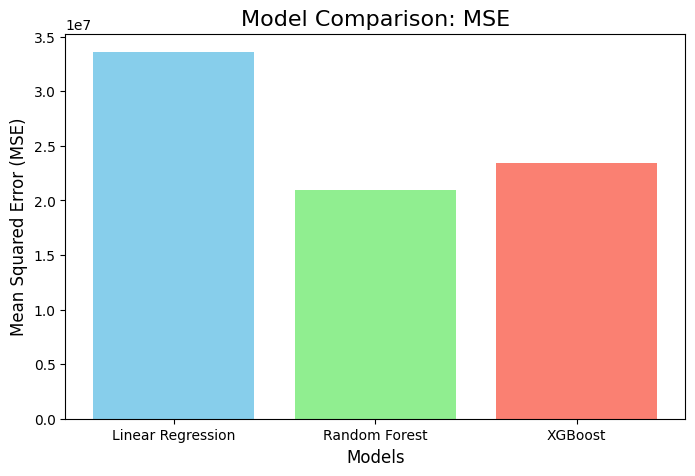

In [7]:
# 모델 성능 비교 시각화
import matplotlib.pyplot as plt
import numpy as np

# 성능 데이터
models = ["Linear Regression", "Random Forest", "XGBoost"]
mse_values = [33596915.85, 20942455.48, 23434704.62]  # mse_log_values 대신 원래 값 사용
rmse_values = [5796.28, 4576.29, 4840.94]
r2_values = [0.78, 0.87, 0.85]

# 모델별 색깔 설정
colors = ['skyblue', 'lightgreen', 'salmon']

# MSE 그래프
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=colors)
plt.title("Model Comparison: MSE", fontsize=16)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

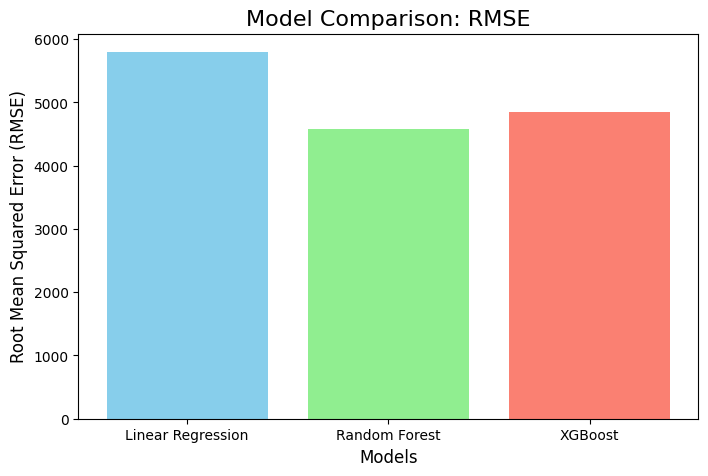

In [8]:
# RMSE 그래프
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=colors)
plt.title("Model Comparison: RMSE", fontsize=16)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

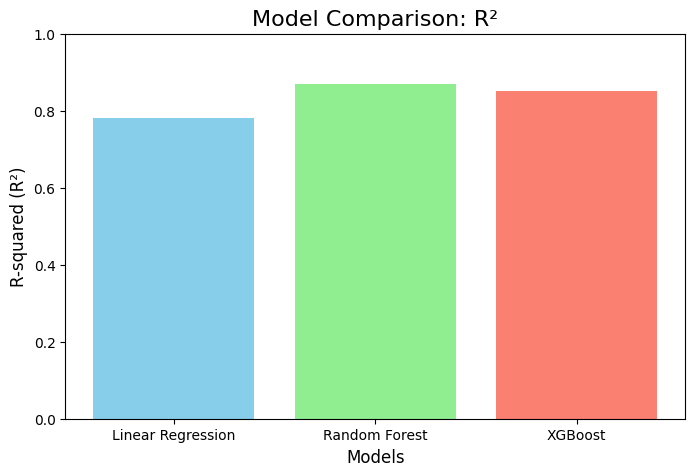

In [9]:
# R² 그래프
plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color=colors)
plt.title("Model Comparison: R²", fontsize=16)
plt.ylabel("R-squared (R²)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1) 
plt.show()

In [10]:

# 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 훈련
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: -22383893.771592274


In [11]:
# 최적 하이퍼파라미터로 모델 재학습
optimized_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# 모델 학습
optimized_rf_model.fit(X_train, y_train)

# 예측
y_pred_optimized = optimized_rf_model.predict(X_test)

# 평가
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Random Forest - Mean Squared Error: {mse_optimized:.2f}")
print(f"Optimized Random Forest - Root Mean Squared Error: {rmse_optimized:.2f}")
print(f"Optimized Random Forest - R-squared: {r2_optimized:.2f}")


Optimized Random Forest - Mean Squared Error: 19599158.90
Optimized Random Forest - Root Mean Squared Error: 4427.09
Optimized Random Forest - R-squared: 0.87


In [12]:
# 하이퍼파라미터 전후 비교 시각화
import matplotlib.pyplot as plt
import numpy as np

# Before
before_tuning = {
    "MSE": 20942455.48,
    "RMSE": 4576.29,
    "R²": 0.87
}

# After
after_tuning = {
    "MSE": mse_optimized,
    "RMSE": rmse_optimized,
    "R²": r2_optimized
}


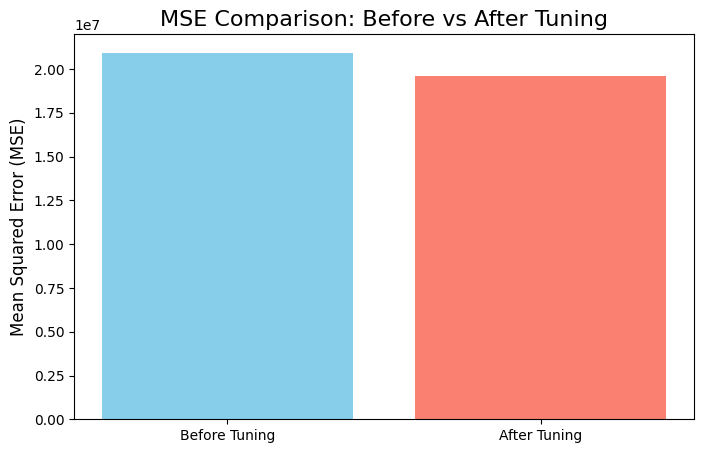

In [13]:
# MSE 그래프
plt.figure(figsize=(8, 5))
x = ["Before Tuning", "After Tuning"]
mse_values = [before_tuning["MSE"], after_tuning["MSE"]]
plt.bar(x, mse_values, color=['skyblue', 'salmon'])
plt.title("MSE Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

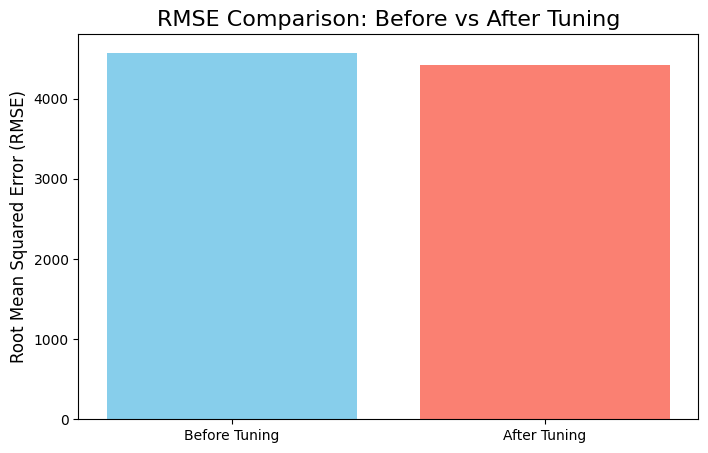

In [14]:
# RMSE 그래프
plt.figure(figsize=(8, 5))
rmse_values = [before_tuning["RMSE"], after_tuning["RMSE"]]
plt.bar(x, rmse_values, color=['skyblue', 'salmon'])
plt.title("RMSE Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

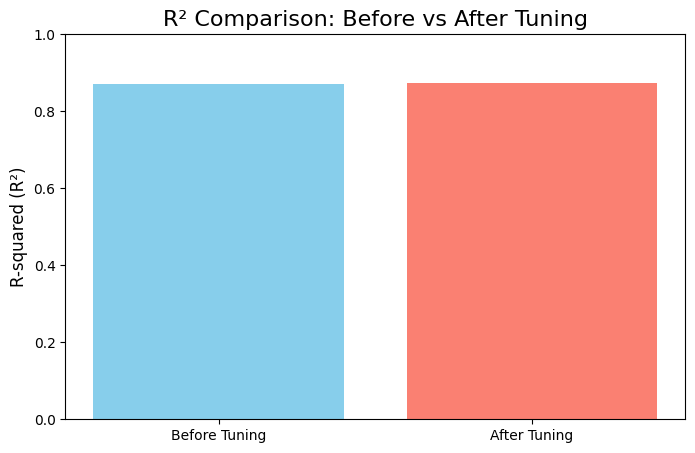

In [15]:
# R² 그래프
plt.figure(figsize=(8, 5))
r2_values = [before_tuning["R²"], after_tuning["R²"]]
plt.bar(x, r2_values, color=['skyblue', 'salmon'])
plt.title("R² Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("R-squared (R²)", fontsize=12)
plt.ylim(0, 1) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
# 특성 중요도
import matplotlib.pyplot as plt
import pandas as pd

# 특성 중요도 추출
feature_importances = optimized_rf_model.feature_importances_
feature_names = X_train.columns

# 데이터프레임 생성
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# 변수 중요도 출력
print(importance_df)


       Feature  Importance
4   smoker_yes    0.664211
1          bmi    0.194653
0          age    0.126829
2     children    0.011649
3  gender_male    0.002658


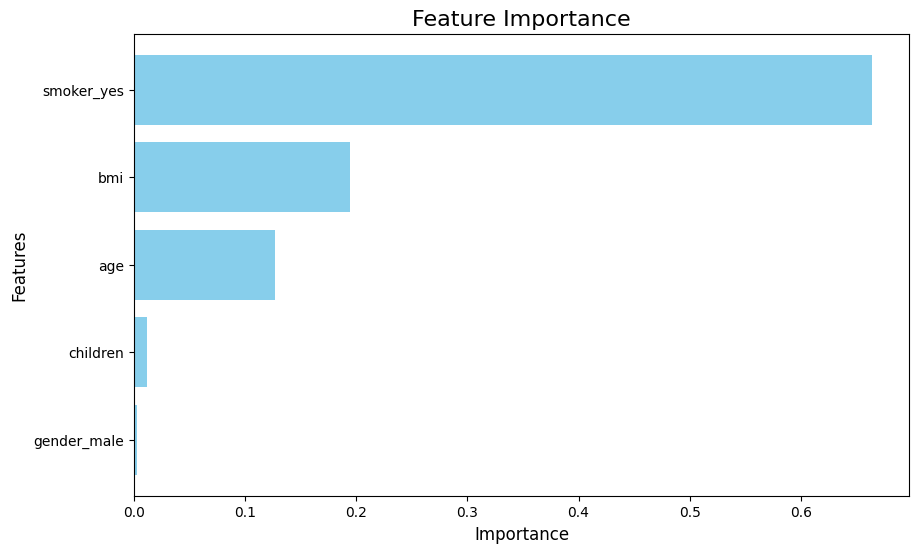

In [17]:
# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



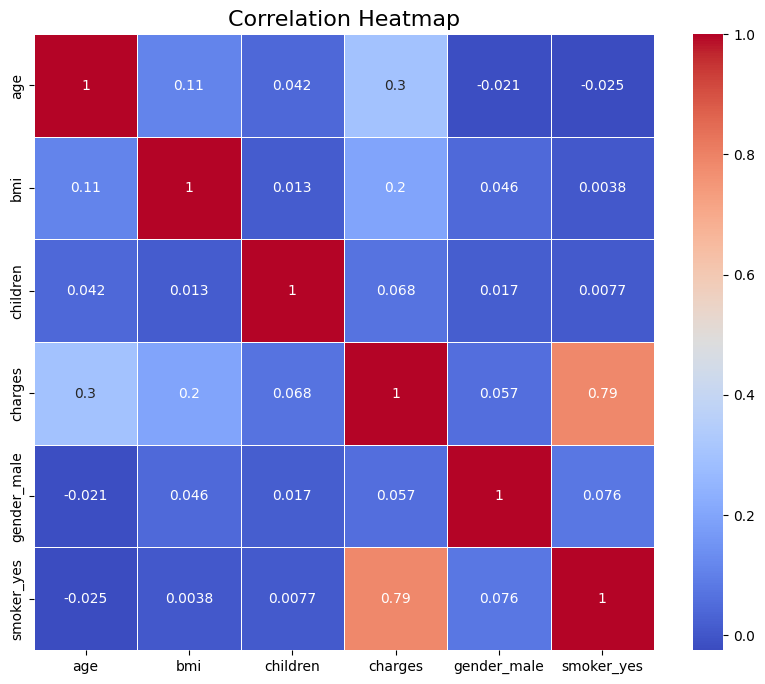

In [18]:
# 상관관계 분석
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


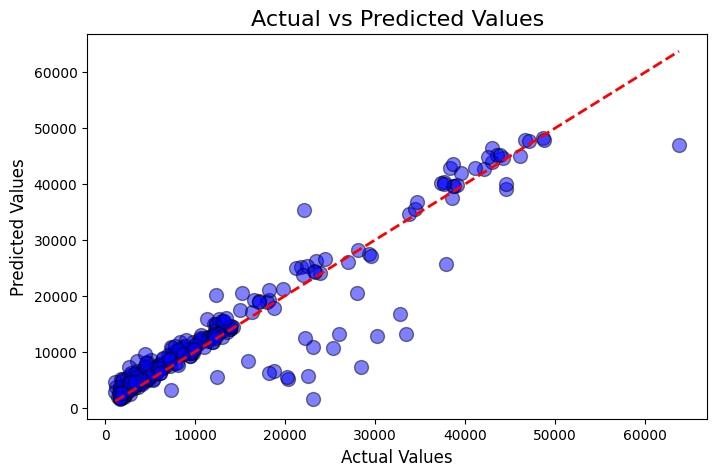

In [19]:
# 실제값 vs 예측값 시각화
import matplotlib.pyplot as plt
import numpy as np

# 실제값과 예측값
y_actual = y_test
y_pred = y_pred_optimized

# 실제값과 예측값 비교(산점도)
plt.figure(figsize=(8, 5))
plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', edgecolor='black', s=100)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [20]:
# 실제값과 예측값 비교 (테이블 출력)
import pandas as pd

comparsion = pd.DataFrame({
    "Actual": y_actual,
    "Predicted": y_pred
}).reset_index(drop=True)

# 상위 10개 샘플 출력
print(comparsion.head(10))


        Actual     Predicted
0   9095.06825  10268.533952
1   5272.17580   5068.546279
2  29330.98315  27564.402687
3   9301.89355  10136.209887
4  33750.29180  34682.469028
5   4536.25900   7398.874475
6   2117.33885   1924.619596
7  14210.53595  14394.146437
8   3732.62510   4959.497048
9  10264.44210  11418.935648
